In [2]:
%matplotlib inline

In [3]:
import cot_reports as cot
import pandas as pd

# Example for collecting data of a few years, here from 2017 to 2020, of a specified report:
df = pd.DataFrame()
begin_year = 2011
end_year = 2024
for i in range(begin_year, end_year + 1):
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='traders_in_financial_futures_fut')) 
    df = pd.concat([df, single_year], ignore_index=True)


Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2011
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2012
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2013
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2014
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2015
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2016
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2017
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fu

In [4]:
df.columns

Index(['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD',
       'Report_Date_as_MM_DD_YYYY', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code',
       'Open_Interest_All', 'Dealer_Positions_Long_All',
       'Dealer_Positions_Short_All', 'Dealer_Positions_Spread_All',
       'Asset_Mgr_Positions_Long_All', 'Asset_Mgr_Positions_Short_All',
       'Asset_Mgr_Positions_Spread_All', 'Lev_Money_Positions_Long_All',
       'Lev_Money_Positions_Short_All', 'Lev_Money_Positions_Spread_All',
       'Other_Rept_Positions_Long_All', 'Other_Rept_Positions_Short_All',
       'Other_Rept_Positions_Spread_All', 'Tot_Rept_Positions_Long_All',
       'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All',
       'NonRept_Positions_Short_All', 'Change_in_Open_Interest_All',
       'Change_in_Dealer_Long_All', 'Change_in_Dealer_Short_All',
       'Change_in_Dealer_Spread_All', 'Change_in_Asset_Mgr_Long_All',
       'Change_in_Asset_Mgr_Short_A

In [5]:
nasdaq_df = df[df['Market_and_Exchange_Names'] == "NASDAQ-100 Consolidated - CHICAGO MERCANTILE EXCHANGE"]
print(nasdaq_df[['As_of_Date_In_Form_YYMMDD', 'Change_in_Tot_Rept_Long_All']])


       As_of_Date_In_Form_YYMMDD Change_in_Tot_Rept_Long_All
8319                      151229                        1782
8320                      151222                      -16919
8321                      151215                       11098
8322                      151208                       -1456
8323                      151201                        1435
...                          ...                         ...
29897                     240130                        4826
29898                     240123                       16270
29899                     240116                        1267
29900                     240109                        4254
29901                     240102                       -5547

[507 rows x 2 columns]


In [6]:
import plotly.graph_objects as go

# Filter the dataframe for NASDAQ-100 Consolidated
nasdaq_df = df[df['Market_and_Exchange_Names'] == "NASDAQ-100 Consolidated - CHICAGO MERCANTILE EXCHANGE"]

# Convert 'As_of_Date_In_Form_YYMMDD' to datetime
nasdaq_df.loc[:, 'Date'] = pd.to_datetime(nasdaq_df['As_of_Date_In_Form_YYMMDD'], format='%y%m%d')

# Sort the dataframe by date
nasdaq_df = nasdaq_df.sort_values('Date')

nasdaq_df['Change_in_Tot_Rept_Long_All'] = nasdaq_df['Change_in_Tot_Rept_Long_All'].astype(float)

# Create the plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=nasdaq_df['Date'], y=nasdaq_df['Change_in_Tot_Rept_Long_All'],
                         mode='lines', name='Change in Total Reportable Long Positions'))

# Customize the plot
fig.update_layout(
    title='Change in Total Reportable Long Positions for NASDAQ-100 Consolidated',
    xaxis_title='Date',
    yaxis_title='Change in Total Reportable Long Positions',
    width=1200,
    height=600
)

# Show the plot
fig.show()


C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\682549185.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq_df.loc[:, 'Date'] = pd.to_datetime(nasdaq_df['As_of_Date_In_Form_YYMMDD'], format='%y%m%d')


In [7]:
# Read the BTC/USD data from CSV file
btc_usd_df = pd.read_csv('../data/btcusd.csv')

# Convert the 'Date' column to datetime
btc_usd_df['Date'] = pd.to_datetime(btc_usd_df['time']/1000, unit='s')

# Sort the dataframe by date
btc_usd_df = btc_usd_df.sort_values('Date')

# Resample the data to hourly intervals
btc_usd_df = btc_usd_df.set_index('Date').resample('d').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).reset_index()

# Display the first few rows of the dataframe
print(btc_usd_df.head())

# Display basic information about the dataframe
print(btc_usd_df.info())


        Date        open      high        low       close        volume
0 2013-04-01   93.250000  105.9000   92.49999  103.999000   5224.401313
1 2013-04-02  104.000000  118.3867   99.00000  118.229354   8376.527478
2 2013-04-03  117.958261  146.8800  101.51088  134.700000  12996.245072
3 2013-04-04  134.716560  143.0000  119.00000  132.899000   6981.668305
4 2013-04-05  130.100010  145.0000  128.25000  142.300000   5234.882203
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3843 non-null   datetime64[ns]
 1   open    3706 non-null   float64       
 2   high    3706 non-null   float64       
 3   low     3706 non-null   float64       
 4   close   3706 non-null   float64       
 5   volume  3843 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 180.3 KB
None


In [84]:
# Strategy Parameters

prediction_lag = 1 # Time to predict ahead
sequence_length = 10  # Length of the sequence of features in LSTM


In [85]:
# Ensure both dataframes have a common date format
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date']).dt.date
btc_usd_df['Date'] = pd.to_datetime(btc_usd_df['Date']).dt.date

# Merge the dataframes on the 'Date' column
merged_df = pd.merge(btc_usd_df, nasdaq_df[['Date', 'Change_in_Tot_Rept_Long_All']], on='Date', how='left')

# Rename the column for clarity
merged_df = merged_df.rename(columns={'Change_in_Tot_Rept_Long_All': 'NASDAQ_Change_in_Tot_Rept_Long_All'})

# Convert the new column to float (if it's not already)
merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].astype(float)

# Fill NaN values with 0 or the last known value
# Option 1: Fill with 0
# merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].fillna(0)

# Option 2: Forward fill (use the last known value)
merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].ffill()

# Update btc_usd_df with the new column
btc_df = merged_df

# Display the first few rows of the updated dataframe
print(btc_df.head())

# Display basic information about the updated dataframe
print(btc_df.info())

print(btc_df[btc_df['NASDAQ_Change_in_Tot_Rept_Long_All'].notna()])


         Date        open      high        low       close        volume  \
0  2013-04-01   93.250000  105.9000   92.49999  103.999000   5224.401313   
1  2013-04-02  104.000000  118.3867   99.00000  118.229354   8376.527478   
2  2013-04-03  117.958261  146.8800  101.51088  134.700000  12996.245072   
3  2013-04-04  134.716560  143.0000  119.00000  132.899000   6981.668305   
4  2013-04-05  130.100010  145.0000  128.25000  142.300000   5234.882203   

   NASDAQ_Change_in_Tot_Rept_Long_All  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                3843 non-null   object 
 1

In [86]:
# Shift the 'close' column by -3 to create the target column (BTCUSD close price at T+3)
btc_df['Target_Close'] = btc_df['close'].shift(-prediction_lag)

# Drop rows with NaN in 'Target_Close' (these are the last 3 rows after shifting)
btc_df = btc_df.dropna(subset=['Target_Close']).reset_index(drop=True)

btc_df.tail()

,Date,open,high,low,close,volume,NASDAQ_Change_in_Tot_Rept_Long_All,Target_Close
3700,2023-10-03,27532.0,27700.0,27176.0,27431.0,767.656761,17011.0,27813.0
3701,2023-10-04,27431.0,27846.0,27211.0,27813.0,889.626490,17011.0,27418.0
3702,2023-10-05,27815.0,28134.0,27369.0,27418.0,1444.942181,17011.0,27942.0
3703,2023-10-06,27418.0,28297.0,27195.0,27942.0,1622.530649,17011.0,27967.0
3704,2023-10-07,27927.0,28026.0,27840.0,27967.0,447.166805,17011.0,27912.0


In [87]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select features
features = ['open', 'high', 'low', 'close', 'volume', 'NASDAQ_Change_in_Tot_Rept_Long_All']

# Assuming 'Target_Close' has been shifted and NaNs dropped
# Remove any remaining NaNs to avoid issues during scaling and sequencing
btc_df.dropna(subset=features + ['Target_Close'], inplace=True)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(btc_df) * split_ratio)

btc_df_train = btc_df.iloc[:split_index].reset_index(drop=True)
btc_df_test = btc_df.iloc[split_index:].reset_index(drop=True)

# Keep a copy of the unscaled test data
btc_df_test_unscaled = btc_df_test.copy()

# Fit scalers on training data
scaler = MinMaxScaler()
scaler.fit(btc_df_train[features])

target_scaler = MinMaxScaler()
target_scaler.fit(btc_df_train['Target_Close'].values.reshape(-1, 1))

# Transform both training and testing data
btc_df_train[features] = scaler.transform(btc_df_train[features])
btc_df_test[features] = scaler.transform(btc_df_test[features])

btc_df_train['Target_Close'] = target_scaler.transform(btc_df_train['Target_Close'].values.reshape(-1, 1))
btc_df_test['Target_Close'] = target_scaler.transform(btc_df_test['Target_Close'].values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, features, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X_seq = data[features].iloc[i:i+sequence_length].values
        y_target = data['Target_Close'].iloc[i+sequence_length]
        X.append(X_seq)
        y.append(y_target)
    return np.array(X), np.array(y)

# Create sequences from training data
X_train, y_train = create_sequences(btc_df_train, features, sequence_length)

# Create sequences from testing data
X_test, y_test = create_sequences(btc_df_test, features, sequence_length)

# Handle NaNs if any
valid_indices_train = ~np.isnan(X_train).any(axis=(1, 2)) & ~np.isnan(y_train)
X_train = X_train[valid_indices_train]
y_train = y_train[valid_indices_train]

valid_indices_test = ~np.isnan(X_test).any(axis=(1, 2)) & ~np.isnan(y_test)
X_test = X_test[valid_indices_test]
y_test = y_test[valid_indices_test]

print("Training data shapes:", X_train.shape, y_train.shape)
print("Testing data shapes:", X_test.shape, y_test.shape)

Training data shapes: (2467, 10, 6) (2467,)
Testing data shapes: (610, 10, 6) (610,)


In [65]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(sequence_length, len(features))))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0164 - val_loss: 0.0018
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0780e-04 - val_loss: 0.0017
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7547e-04 - val_loss: 0.0013
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3389e-04 - val_loss: 0.0019
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0464e-04 - val_loss: 0.0013
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5830e-04 - val_loss: 0.0011
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8378e-04 - val_loss: 8.6900e-04
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6955e-04 - val_loss: 8.4384e-04
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0227e-04 - val_loss: 0.0014
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7772e-04 - val_loss: 8.8925e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9562e-04 - val_loss: 8.4236e-04
Epoch 12/50
78/78 

In [66]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 7.8658e-04
Test Loss: 0.0005728297983296216


In [67]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_scaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_scaled = target_scaler.inverse_transform(y_pred)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

RMSE: 1611.8018872713012
MAE: 1149.462793865869


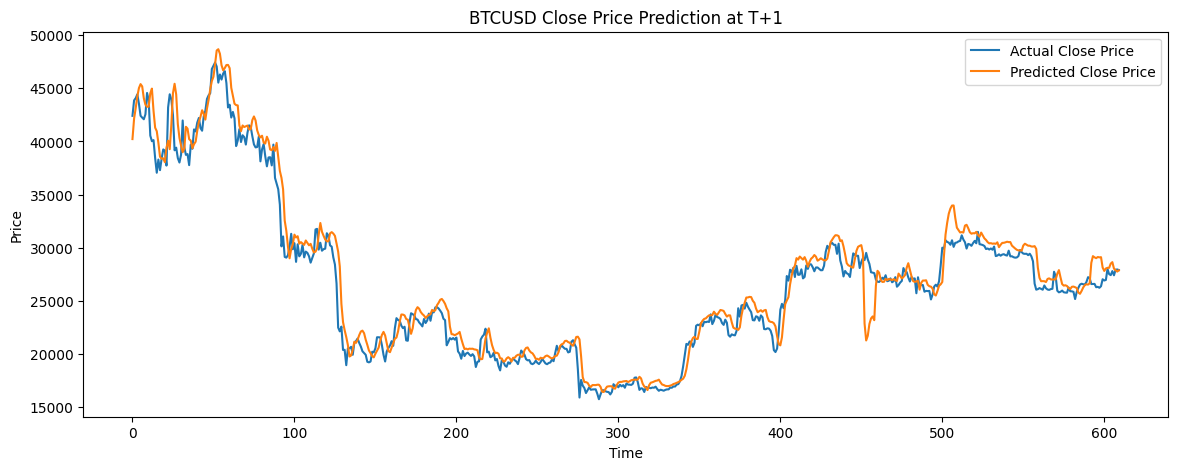

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test_scaled, label='Actual Close Price')
plt.plot(y_pred_scaled, label='Predicted Close Price')
plt.title(f'BTCUSD Close Price Prediction at T+{prediction_lag}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [89]:
# Prepping data for strategy backtesting

def create_sequences_test(data, features, sequence_length):
    X = []
    y = []
    sequence_end_dates = []
    target_dates = []
    cot_change_flags = []
    for i in range(len(data) - sequence_length):
        X_seq = data[features].iloc[i:i+sequence_length].values
        y_target = data['Target_Close'].iloc[i+sequence_length]
        X.append(X_seq)
        y.append(y_target)
        sequence_end_dates.append(data['Date'].iloc[i+sequence_length - 1])
        target_dates.append(data['Date'].iloc[i+sequence_length])
        cot_change_flags.append(data['NASDAQ_Change_in_Tot_Rept_Long_All'].iloc[i+sequence_length - 1] != data['NASDAQ_Change_in_Tot_Rept_Long_All'].iloc[i+sequence_length - 2])
    return np.array(X), np.array(y), sequence_end_dates, target_dates, cot_change_flags

# Create sequences for testing data
X_test, y_test, sequence_end_dates_test, target_dates_test, cot_change_flags_test = create_sequences_test(btc_df_test, features, sequence_length)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = target_scaler.inverse_transform(y_pred)

# Build a DataFrame with the results
results_df = pd.DataFrame({
    'Sequence_End_Date': sequence_end_dates_test,
    'Target_Date': target_dates_test,
    'COT_Change_Flag': cot_change_flags_test,
    'Predicted_Price': y_pred_unscaled.flatten(),
    'Actual_Price': y_test_unscaled.flatten()
})


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


In [90]:
# Map the open prices to the Target_Date
btc_df_test['Date'] = pd.to_datetime(btc_df_test['Date'])
prices_df = btc_df_test_unscaled[['Date', 'open', 'high', 'low', 'close']].set_index('Date')

# Add Entry_Price to results_df
results_df['Entry_Price'] = results_df['Target_Date'].map(prices_df['open'])

print(prices_df)


                    open     high           low         close
Date                                                         
2022-01-26  36995.000000  38935.0  36291.695939  36828.542176
2022-01-27  36847.647615  37275.0  35504.000000  37194.000000
2022-01-28  37187.000000  38055.0  36197.000000  37759.827189
2022-01-29  37748.000000  38898.0  37347.691827  38179.911234
2022-01-30  38201.609790  38403.0  37386.000000  37914.380832
...                  ...      ...           ...           ...
2023-10-03  27532.000000  27700.0  27176.000000  27431.000000
2023-10-04  27431.000000  27846.0  27211.000000  27813.000000
2023-10-05  27815.000000  28134.0  27369.000000  27418.000000
2023-10-06  27418.000000  28297.0  27195.000000  27942.000000
2023-10-07  27927.000000  28026.0  27840.000000  27967.000000

[620 rows x 4 columns]


In [104]:
# Trade parameters

initial_capital = 10000  # Starting capital
capital = initial_capital  # Capital that will be updated after each trade
capital_at_risk = 1
target_price_multiplier = 0.5
stop_loss_multiplier = 0.02


In [105]:
trades = []

for idx, row in results_df.iterrows():
    if row['COT_Change_Flag']:
        entry_date = row['Target_Date']
        entry_price = row['Entry_Price']
        predicted_price = row['Predicted_Price']
        
        # Skip if entry_price or predicted_price is NaN
        if np.isnan(entry_price) or np.isnan(predicted_price):
            continue
        
        # Determine the position and calculate target and stop-loss prices
        if predicted_price > entry_price:
            position = 'long'
            target_price = entry_price + target_price_multiplier * (predicted_price - entry_price)
            stop_price = entry_price - stop_loss_multiplier * entry_price
            stop_loss_amount = entry_price - stop_price  # Amount risked per unit
        else:
            position = 'short'
            target_price = entry_price - target_price_multiplier * (entry_price - predicted_price)
            stop_price = entry_price + stop_loss_multiplier * entry_price
            stop_loss_amount = stop_price - entry_price  # Amount risked per unit

        trade_amount = capital * capital_at_risk
        
        # Determine the number of units to trade
        units = trade_amount / entry_price
        
        # Check if units are feasible (avoid division by zero)
        if units <= 0 or np.isinf(units):
            continue
        
        # Simulate the trade
        exit_date = None
        exit_price = None
        profit_loss = None
        
        # Get dates at and after the entry date
        dates_after_entry = prices_df.loc[entry_date:].index
        
        for current_date in dates_after_entry:
            close_price = prices_df.loc[current_date, 'close']
            high_price = prices_df.loc[current_date, 'high']
            low_price = prices_df.loc[current_date, 'low']
            if position == 'long':
                if high_price >= target_price:
                    exit_date = current_date
                    exit_price = target_price
                    profit_loss = (exit_price - entry_price) * units
                    capital += profit_loss  # Update capital
                    break
                elif low_price <= stop_price:
                    exit_date = current_date
                    exit_price = stop_price
                    profit_loss = (entry_price - exit_price) * units
                    capital += profit_loss  # Update capital
                    break
            else:  # short position
                if low_price <= target_price:
                    exit_date = current_date
                    exit_price = target_price
                    profit_loss = (entry_price - exit_price) * units
                    capital += profit_loss  # Update capital
                    break
        
        # If the trade is still open at the end of data, close it
        if exit_date is None:
            exit_date = dates_after_entry[-1]
            exit_price = prices_df.loc[exit_date, 'close']
            if position == 'long':
                profit_loss = (exit_price - entry_price) * units
            else:
                profit_loss = (entry_price - exit_price) * units
            capital += profit_loss  # Update capital
        
        # Record the trade
        trade = {
            'Entry_Date': entry_date,
            'Entry_Price': entry_price,
            'Position': position,
            'Units': units,
            'Target_Price': target_price,
            'Stop_Price': stop_price,
            'Exit_Date': exit_date,
            'Exit_Price': exit_price,
            'Profit_Loss': profit_loss,
            'Remaining_Capital': capital
        }
        trades.append(trade)
        
        # Optionally, you can stop trading if capital falls below a threshold
        if capital <= 0:
            print("No more capital to trade.")
            break

# Create a DataFrame of trades
trades_df = pd.DataFrame(trades)

In [107]:
# Calculate total profit/loss
total_profit_loss = trades_df['Profit_Loss'].sum()
print(f"Total Profit/Loss: {total_profit_loss}")

# Number of trades
total_trades = len(trades_df)
print(f"Total Trades: {total_trades}")

# Number of winning trades
winning_trades = trades_df[trades_df['Profit_Loss'] > 0].shape[0]
print(f"Winning Trades: {winning_trades}")

# Number of losing trades
losing_trades = trades_df[trades_df['Profit_Loss'] <= 0].shape[0]
print(f"Losing Trades: {losing_trades}")

# Average profit per trade
average_profit = trades_df['Profit_Loss'].mean()
print(f"Average Profit per Trade: {average_profit}")

# Print the trades
print(trades_df)


Total Profit/Loss: 21663.01355263398
Total Trades: 87
Winning Trades: 86
Losing Trades: 1
Average Profit per Trade: 249.00015577740206
    Entry_Date   Entry_Price Position     Units  Target_Price    Stop_Price  \
0   2022-02-09  44079.552026     long  0.226863  44553.199841  43197.960985   
1   2022-02-16  44567.000000    short  0.226792  44548.779297  45458.340000   
2   2022-02-23  38294.000000     long  0.264051  38334.623047  37528.120000   
3   2022-03-02  44442.000000     long  0.227765  44493.642578  43553.160000   
4   2022-03-09  38764.000000     long  0.261430  39049.552734  37988.720000   
..         ...           ...      ...       ...           ...           ...   
82  2023-09-06  25798.000000     long  1.240702  26004.384766  25282.040000   
83  2023-09-13  25854.000000    short  1.247919  25764.736328  26371.080000   
84  2023-09-20  27245.000000     long  1.087423  27916.294922  26700.100000   
85  2023-09-27  26250.000000     long  1.151214  27199.105469  25725.000000

In [132]:
from plotly.subplots import make_subplots

# Prepare the price data
prices_df_chart = prices_df.copy()
prices_df_chart.index = pd.to_datetime(prices_df_chart.index)
prices_df_chart.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)
prices_df_chart.sort_index(inplace=True)

# Prepare the trade data
trades_df['Entry_Date'] = pd.to_datetime(trades_df['Entry_Date'])
trades_df['Exit_Date'] = pd.to_datetime(trades_df['Exit_Date'])
trades_df.sort_values('Exit_Date', inplace=True)

# Calculate capital over time
capital_over_time = trades_df[['Exit_Date', 'Remaining_Capital']].copy()
capital_over_time.drop_duplicates(subset='Exit_Date', inplace=True)

# Create full date range
full_date_range = pd.date_range(start=prices_df_chart.index.min(), end=prices_df_chart.index.max(), freq='D')

# Capital time series
capital_time_series = pd.DataFrame(index=full_date_range)
capital_time_series = capital_time_series.merge(capital_over_time.set_index('Exit_Date'), left_index=True, right_index=True, how='left')
capital_time_series['Remaining_Capital'].fillna(method='ffill', inplace=True)
initial_capital = trades_df['Remaining_Capital'].iloc[0] - trades_df['Profit_Loss'].iloc[0]
capital_time_series['Remaining_Capital'].fillna(initial_capital, inplace=True)
capital_time_series['Strategy_Returns'] = capital_time_series['Remaining_Capital'] / initial_capital - 1

# Price time series for buy-and-hold returns
price_time_series = prices_df_chart['Close'].reindex(full_date_range).ffill()
initial_price = price_time_series.iloc[0]
price_time_series = price_time_series.to_frame(name='Close')
price_time_series['Buy_and_Hold_Returns'] = price_time_series['Close'] / initial_price - 1

# Create subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=('BTCUSD Price with Trades', 'Cumulative Returns')
)

# Add candlestick chart
fig.add_trace(go.Candlestick(
    x=prices_df_chart.index,
    open=prices_df_chart['Open'],
    high=prices_df_chart['High'],
    low=prices_df_chart['Low'],
    close=prices_df_chart['Close'],
    name='Price'
), row=1, col=1)

# Add entry and exit markers
fig.add_trace(go.Scatter(
    x=trades_df['Entry_Date'],
    y=trades_df['Entry_Price'],
    mode='markers',
    marker=dict(
        symbol='triangle-up',
        color='green',
        size=10
    ),
    name='Entry'
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=trades_df['Exit_Date'],
    y=trades_df['Exit_Price'],
    mode='markers',
    marker=dict(
        symbol='triangle-down',
        color='red',
        size=10
    ),
    name='Exit'
), row=1, col=1)

# Add cumulative returns
fig.add_trace(go.Scatter(
    x=capital_time_series.index,
    y=capital_time_series['Strategy_Returns'],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Strategy Returns'
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=price_time_series.index,
    y=price_time_series['Buy_and_Hold_Returns'],
    mode='lines',
    line=dict(color='orange', width=2),
    name='Buy and Hold Returns'
), row=2, col=1)

# Update layout
fig.update_layout(
    title='BTCUSD Price Chart with Trade Entries, Exits, and Cumulative Returns',
    xaxis_rangeslider_visible=False,
    template='plotly_white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.1,
        xanchor='center',
        x=0.5
    ),
    yaxis=dict(title='Price (USD)'),
    yaxis2=dict(title='Cumulative Returns', tickformat='.0%'),
    height=800
)

# Show the figure
fig.show()



C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\1211494571.py:30: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\1211494571.py:30: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\1211494571.py:32: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wil